In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from konlpy.tag import Okt
okt = Okt()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
import time

# 데이터 준비

In [2]:
df = pd.read_csv('mbti_cafe_labeled.csv')

FileNotFoundError: File b'mbti_cafe_labeled.csv' does not exist

In [ ]:
del df['Unnamed: 0']

In [4]:
df.head()

,url,user,date,board,title,content,reply,view,like,type
0,https://cafe.naver.com/ArticleRead.nhn?clubid=...,스탭 하얀늑대 isfp(jish****),2019.05.09. 18:03,[종합] 모임 단톡 공지,오프라인 톡방 개시 '한강의온도 시즌1' 지역제한X 나이수정,안녕하세요 스탭 하얀늑대입니다.오프라인번개를 중심으로한 톡방을운영하고있습니다.▶▶방...,0.0,272,3.0,isfp
1,https://cafe.naver.com/ArticleRead.nhn?clubid=...,총무스탭 우노esfp9w8(just****),2019.05.02. 10:34,[종합] 모임 단톡 공지,[오픈 톡방] TEA & MBTI STORY,주제 : 차(TEA) 관련 모임모임 : 차연 및 그 외 TEA 카페 오프라인 모임개...,18.0,413,3.0,esfp
2,https://cafe.naver.com/ArticleRead.nhn?clubid=...,스탭 하얀늑대 isfp(jish****),2019.03.26. 13:14,공지 사항,우리카페 통계 몇가지 <2월>,우리카페의 통계정보가 가끔 궁금했던지라 보다가 올려봅니다.2월통계▶방문자 성별비율 ...,8.0,936,22.0,isfp
3,https://cafe.naver.com/ArticleRead.nhn?clubid=...,총무스탭 앞가마 isfj(apga****),2019.01.03. 22:15,신변 잡기,몇 달동안이나 미루어 왔던 당부의 말씀을 회원님들께 꼭 드리고 싶습니다 (부제: 사...,저는 오래 전부터 본 카페에서 종종 보여왔던 특정 게시글들 및 댓글들을 머리와 가슴...,83.0,"2,057",83.0,isfj
4,https://cafe.naver.com/ArticleRead.nhn?clubid=...,킁킁estp(mkla****),2019.05.18. 19:23,ISTP ♤ ESTP,Estp 여자 이미지 어떤가요?,참고로 에니어그램은 8w7 입니다~~,0.0,2,0.0,estp


### title과 content 하나로 합치기

In [ ]:
df["total"] = df["title"].map(str) + ' ' + df["content"].map(str)

In [6]:
df.head()

,url,user,date,board,title,content,reply,view,like,type,total
0,https://cafe.naver.com/ArticleRead.nhn?clubid=...,스탭 하얀늑대 isfp(jish****),2019.05.09. 18:03,[종합] 모임 단톡 공지,오프라인 톡방 개시 '한강의온도 시즌1' 지역제한X 나이수정,안녕하세요 스탭 하얀늑대입니다.오프라인번개를 중심으로한 톡방을운영하고있습니다.▶▶방...,0.0,272,3.0,isfp,오프라인 톡방 개시 '한강의온도 시즌1' 지역제한X 나이수정 안녕하세요 스탭 하얀늑...
1,https://cafe.naver.com/ArticleRead.nhn?clubid=...,총무스탭 우노esfp9w8(just****),2019.05.02. 10:34,[종합] 모임 단톡 공지,[오픈 톡방] TEA & MBTI STORY,주제 : 차(TEA) 관련 모임모임 : 차연 및 그 외 TEA 카페 오프라인 모임개...,18.0,413,3.0,esfp,[오픈 톡방] TEA & MBTI STORY 주제 : 차(TEA) 관련 모임모임 :...
2,https://cafe.naver.com/ArticleRead.nhn?clubid=...,스탭 하얀늑대 isfp(jish****),2019.03.26. 13:14,공지 사항,우리카페 통계 몇가지 <2월>,우리카페의 통계정보가 가끔 궁금했던지라 보다가 올려봅니다.2월통계▶방문자 성별비율 ...,8.0,936,22.0,isfp,우리카페 통계 몇가지 <2월> 우리카페의 통계정보가 가끔 궁금했던지라 보다가 올려봅...
3,https://cafe.naver.com/ArticleRead.nhn?clubid=...,총무스탭 앞가마 isfj(apga****),2019.01.03. 22:15,신변 잡기,몇 달동안이나 미루어 왔던 당부의 말씀을 회원님들께 꼭 드리고 싶습니다 (부제: 사...,저는 오래 전부터 본 카페에서 종종 보여왔던 특정 게시글들 및 댓글들을 머리와 가슴...,83.0,"2,057",83.0,isfj,몇 달동안이나 미루어 왔던 당부의 말씀을 회원님들께 꼭 드리고 싶습니다 (부제: 사...
4,https://cafe.naver.com/ArticleRead.nhn?clubid=...,킁킁estp(mkla****),2019.05.18. 19:23,ISTP ♤ ESTP,Estp 여자 이미지 어떤가요?,참고로 에니어그램은 8w7 입니다~~,0.0,2,0.0,estp,Estp 여자 이미지 어떤가요? 참고로 에니어그램은 8w7 입니다~~


### 형태소 분석

In [35]:
df['morphs'] = np.nan

In [ ]:
for i in range(len(df)):
    df['morphs'][i] = okt.morphs(df['total'][i], norm=True, stem=True)
    print(i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

중간에 항상 에러가 나면서 멈춰요..ㅠㅠ  
같이 해결 방법을 생각해 보아요  
다른 형태소 분석기 사용? 좋은 컴퓨터?

### E와 I 분리하기

In [19]:
dfe = df.loc[df['type'].str.contains('e')]
dfi = df.loc[df['type'].str.contains('i')]

In [20]:
print("The number of E:", dfe.shape)
print("The number of I:", dfi.shape)

The number of E: (10759, 11)
The number of I: (22316, 11)


### 모든 글 합쳐 하나의 list 형태로 만들기

In [21]:
texte = dfe['total'].tolist()
texte = ''.join(texte)

In [22]:
texti = dfi['total'].tolist()
texti = ''.join(texti)

In [25]:
print("The number of E (words):", len(texte))
print("The number of I (words):", len(texti))

The number of E (words): 6301145
The number of I (words): 12890416


### okt로 명사만 뽑기

In [26]:
nounse = okt.nouns(texte)
with open('noun_e.txt', 'wb') as f:
    pickle.dump(nounse, f)

In [43]:
with open('noun_e.txt', 'rb') as f:
    nounse = pickle.load(f)

In [30]:
nounsi = okt.nouns(texti)
with open('noun_i.txt', 'wb') as f:
    pickle.dump(nounsi, f)

java.lang.OutOfMemoryErrorPyRaisable: java.lang.OutOfMemoryError: Java heap space

### 다른 방법으로도 시도해 봤으나..

In [0]:
joinede = []
for t in dfe.total:
    str_t = ''.join(t)
    joinede.append(str_t)

In [0]:
joinedi = []
for t in dfi.total:
    str_t = ''.join(t)
    joinedi.append(str_t)

In [0]:
nounse =[]
for i in range(len(joinede)):
    nouns = okt.nouns(joinede[i])
    for n in nouns:
        nounse.append(n)

In [0]:
len(nounse)

958854

In [0]:
nounsi =[]
for i in range(0,1000):
    nouns = okt.nouns(joinedi[i])
    for n in nouns:
        nounsi.append(n)

In [0]:
len(nounsi)

### 일단 되는 데까지만 한 번 분석해 봅시다

In [ ]:
f = open('mbti_cafe_morphs2.csv', 'w', encoding = 'utf-8', newline='')
wr = csv.writer(f)
wr.writerow(['url', 'morphs'])

for i in range(len(df)):
    morphs = okt.nouns(df['total'][i])
    url = df['url'][i]
    temp_list = [url, morphs]
    f = open('mbti_cafe_morphs2.csv', 'a+', encoding = 'utf-8', newline='')
    wr = csv.writer(f)
    wr.writerow(temp_list)
    print(i)

In [7]:
# 미리 따놨던 csv 파일을 불러옵니다
nouns = pd.read_csv('mbti_cafe_morphs2.csv')

In [8]:
nouns

,url,morphs
0,.naver.com/ArticleRead.nhn?clubid=11856775&men...,"['오프라인', '톡방', '개시', '강의', '온도', '시즌', '지역', '..."
1,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"['오픈', '톡방', '주제', '차', '관련', '모임', '모임', '차연'..."
2,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"['우리', '카페', '통계', '가지', '우리', '카페', '통계', '정보..."
3,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"['몇', '달동', '안이', '당부', '말씀', '회원', '꼭', '부제',..."
4,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"['여자', '이미지', '가요', '참고', '에니어그램']"
5,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"['애녀', '그램', '자객', '위', '감별', '글', '님', '자료', ..."
6,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"['만약', '일', '그로', '상담', '신청', '때', '이유', '여러분'..."
7,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"['펭귄', '만화', '음주운전', '작은아버지', '이번', '이야기', '실화..."
8,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"['세부', '성향', '친소', '관계', '거', '보고', '인간관계', '가..."
9,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"['내', '옷', '스타일', '약간', '옆', '누더기', '옷', '도포',..."


In [9]:
new_df = df.merge(nouns, left_on='url', right_on='url')

In [205]:
new_df.shape

(714, 12)

In [11]:
new_df.head()

,url,user,date,board,title,content,reply,view,like,type,total,morphs
0,https://cafe.naver.com/ArticleRead.nhn?clubid=...,총무스탭 우노esfp9w8(just****),2019.05.02. 10:34,[종합] 모임 단톡 공지,[오픈 톡방] TEA & MBTI STORY,주제 : 차(TEA) 관련 모임모임 : 차연 및 그 외 TEA 카페 오프라인 모임개...,18.0,413,3.0,esfp,[오픈 톡방] TEA & MBTI STORY 주제 : 차(TEA) 관련 모임모임 :...,"['오픈', '톡방', '주제', '차', '관련', '모임', '모임', '차연'..."
1,https://cafe.naver.com/ArticleRead.nhn?clubid=...,스탭 하얀늑대 isfp(jish****),2019.03.26. 13:14,공지 사항,우리카페 통계 몇가지 <2월>,우리카페의 통계정보가 가끔 궁금했던지라 보다가 올려봅니다.2월통계▶방문자 성별비율 ...,8.0,936,22.0,isfp,우리카페 통계 몇가지 <2월> 우리카페의 통계정보가 가끔 궁금했던지라 보다가 올려봅...,"['우리', '카페', '통계', '가지', '우리', '카페', '통계', '정보..."
2,https://cafe.naver.com/ArticleRead.nhn?clubid=...,총무스탭 앞가마 isfj(apga****),2019.01.03. 22:15,신변 잡기,몇 달동안이나 미루어 왔던 당부의 말씀을 회원님들께 꼭 드리고 싶습니다 (부제: 사...,저는 오래 전부터 본 카페에서 종종 보여왔던 특정 게시글들 및 댓글들을 머리와 가슴...,83.0,"2,057",83.0,isfj,몇 달동안이나 미루어 왔던 당부의 말씀을 회원님들께 꼭 드리고 싶습니다 (부제: 사...,"['몇', '달동', '안이', '당부', '말씀', '회원', '꼭', '부제',..."
3,https://cafe.naver.com/ArticleRead.nhn?clubid=...,킁킁estp(mkla****),2019.05.18. 19:23,ISTP ♤ ESTP,Estp 여자 이미지 어떤가요?,참고로 에니어그램은 8w7 입니다~~,0.0,2,0.0,estp,Estp 여자 이미지 어떤가요? 참고로 에니어그램은 8w7 입니다~~,"['여자', '이미지', '가요', '참고', '에니어그램']"
4,https://cafe.naver.com/ArticleRead.nhn?clubid=...,upquark 뚜쎼 entp(grap****),2019.05.18. 19:14,유형 감별,"애녀그램 자객화를 위한 겁나긴 감별글,",NK님이 올려주신 자료를 토대로 한 번 작성해 보았습니다.공유 감사드립니다.나중에 ...,0.0,15,0.0,entp,"애녀그램 자객화를 위한 겁나긴 감별글, NK님이 올려주신 자료를 토대로 한 번 작성...","['애녀', '그램', '자객', '위', '감별', '글', '님', '자료', ..."


### E/I dimension

In [274]:
a="[1,2,3,3,4,4]"
eval(a)

[1, 2, 3, 3, 4, 4]

In [206]:
dfe = new_df.loc[df['type'].str.contains('e')]
dfi = new_df.loc[df['type'].str.contains('i')]

dfe = dfe.reset_index(drop=True)
dfi = dfi.reset_index(drop=True)

print("The number of E (posts):", dfe.shape)
print("The number of I (posts):", dfi.shape)

The number of E (posts): (257, 12)
The number of I (posts): (457, 12)


In [207]:
texte = []
for i in range(len(dfe)):
    a = dfe['morphs'][i].strip('[').strip(']').replace("'", "").split(", ")
    for j in a:
        texte.append(j)
        
texti = []
for i in range(len(dfi)):
    a = dfi['morphs'][i].strip('[').strip(']').replace("'", "").split(", ")
    for j in a:
        texti.append(j)
        
print("The number of E (words):", len(texte))
print("The number of I (words):", len(texti))

The number of E (words): 23479
The number of I (words): 33829


### N/S dimension

In [208]:
dfn = new_df.loc[df['type'].str.contains('n')]
dfs = new_df.loc[df['type'].str.contains('s')]

dfn = dfn.reset_index(drop=True)
dfs = dfs.reset_index(drop=True)

print("The number of N (posts):", dfn.shape)
print("The number of S (posts):", dfs.shape)

The number of N (posts): (562, 12)
The number of S (posts): (152, 12)


In [209]:
textn = []
for i in range(len(dfn)):
    a = dfn['morphs'][i].strip('[').strip(']').replace("'", "").split(", ")
    for j in a:
        textn.append(j)
        
texts = []
for i in range(len(dfs)):
    a = dfs['morphs'][i].strip('[').strip(']').replace("'", "").split(", ")
    for j in a:
        texts.append(j)
        
print("The number of N (words):", len(textn))
print("The number of S (words):", len(texts))

The number of N (words): 43307
The number of S (words): 14001


### F/T dimension

In [210]:
dff = new_df.loc[df['type'].str.contains('f')]
dft = new_df.loc[df['type'].str.contains('t')]

dff = dff.reset_index(drop=True)
dft = dft.reset_index(drop=True)

print("The number of F (posts):", dff.shape)
print("The number of T (posts):", dft.shape)

The number of F (posts): (341, 12)
The number of T (posts): (373, 12)


In [211]:
textf = []
for i in range(len(dff)):
    a = dff['morphs'][i].strip('[').strip(']').replace("'", "").split(", ")
    for j in a:
        textf.append(j)
        
textt = []
for i in range(len(dft)):
    a = dft['morphs'][i].strip('[').strip(']').replace("'", "").split(", ")
    for j in a:
        textt.append(j)
        
print("The number of F (words):", len(textf))
print("The number of T (words):", len(textt))

The number of F (words): 27180
The number of T (words): 30128


### J/P dimension

In [212]:
dfj = new_df.loc[df['type'].str.contains('j')]
dfp = new_df.loc[df['type'].str.contains('p')]

dfj = dfj.reset_index(drop=True)
dfp = dfp.reset_index(drop=True)

print("The number of J (posts):", dfj.shape)
print("The number of P (posts):", dfp.shape)

The number of J (posts): (241, 12)
The number of P (posts): (473, 12)


In [213]:
textj = []
for i in range(len(dfj)):
    a = dfj['morphs'][i].strip('[').strip(']').replace("'", "").split(", ")
    for j in a:
        textj.append(j)
        
textp = []
for i in range(len(dfp)):
    a = dfp['morphs'][i].strip('[').strip(']').replace("'", "").split(", ")
    for j in a:
        textp.append(j)
        
print("The number of J (words):", len(textj))
print("The number of P (words):", len(textp))

The number of J (words): 22292
The number of P (words): 35016


## 워드 클라우드

In [118]:
# 불용어 제거
stopwords = ['것', '거', '때', '가입', '생각', '말', '유형', '카페', '저', '제', '사람', '그', '수', '이', '답변', '자신', '안',
             '함' ,'나', '글', '걸', '내']

uniquee = set(texte)
uniquei = set(texti)

for word in uniquee:
    if word in stopwords:
        while word in texte: texte.remove(word)
            
for word in uniquei:
    if word in stopwords:
        while word in texti: texti.remove(word)

In [119]:
ecount = Counter(texte)
icount = Counter(texti)

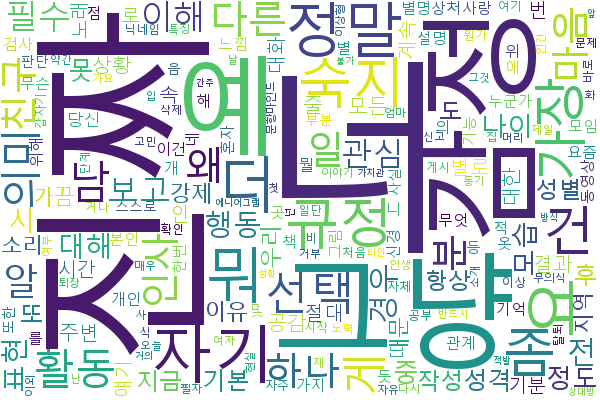

In [120]:
wordcloud = WordCloud(background_color = "white",
                     font_path = "c:/Windows/Fonts/malgun.ttf",
                     width = 600, height = 400)
wordcloud.generate_from_frequencies(ecount)
wordcloud.to_image()

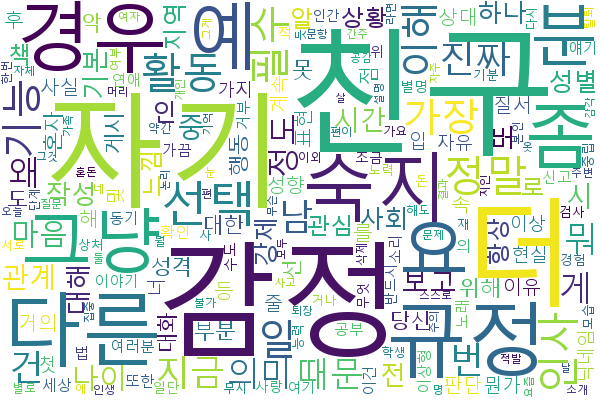

In [121]:
wordcloud.generate_from_frequencies(icount)
wordcloud.to_image()

In [132]:
# 불용어 제거
stopwords = ['것']

uniques = set(texts)
uniquen = set(textn)

for word in uniques:
    if word in stopwords:
        while word in texts: texts.remove(word)
            
for word in uniquen:
    if word in stopwords:
        while word in textn: textn.remove(word)

In [133]:
ncount = Counter(textn)
scount = Counter(texts)

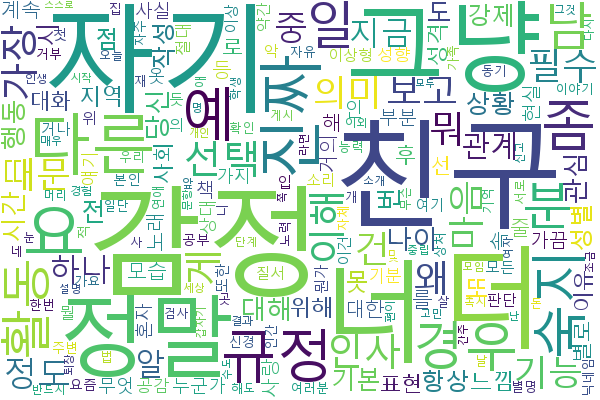

In [134]:
wordcloud.generate_from_frequencies(ncount)
wordcloud.to_image()

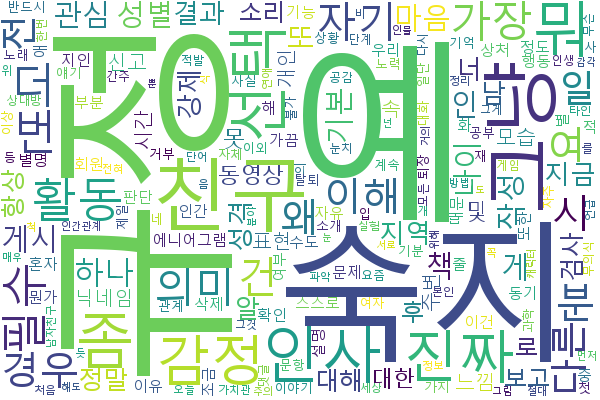

In [135]:
wordcloud.generate_from_frequencies(scount)
wordcloud.to_image()

In [162]:
# 불용어 제거
stopwords = ['것', '사람', '때', '말', '제', '저', '거', '생각', '유형', '답변', '나', '안', '수', '이', '카페', '그', '걸', 
            '내', '자신', '글', '가입']

uniquef = set(textf)
uniquet = set(textt)

for word in uniquef:
    if word in stopwords:
        while word in textf: textf.remove(word)
            
for word in uniquet:
    if word in stopwords:
        while word in textt: textt.remove(word)

In [163]:
fcount = Counter(textf)
tcount = Counter(textt)

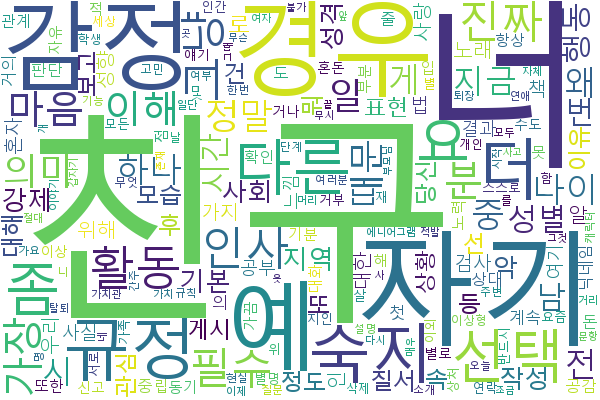

In [164]:
wordcloud.generate_from_frequencies(fcount)
wordcloud.to_image()

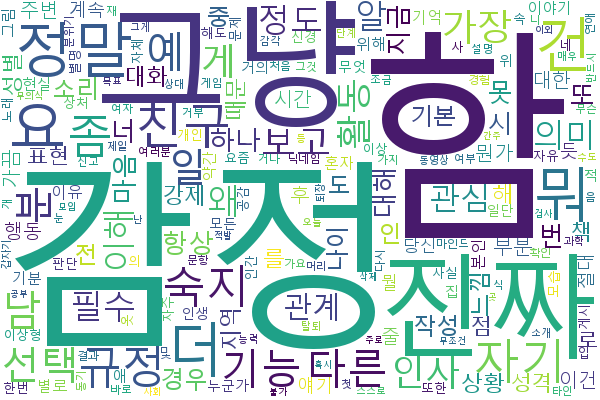

In [165]:
wordcloud.generate_from_frequencies(tcount)
wordcloud.to_image()

In [196]:
# 불용어 제거
stopwords = ['것', '사람', '때', '거', '제', '생각', '저', '말', '유형', '나', '자신', '그', '이', '수', '카페', '답변', '가입',
            '글', '안', '걸', '내']

uniquej = set(textj)
uniquep = set(textp)

for word in uniquej:
    if word in stopwords:
        while word in textj: textj.remove(word)
            
for word in uniquep:
    if word in stopwords:
        while word in textp: textp.remove(word)

In [197]:
jcount = Counter(textj)
pcount = Counter(textp)

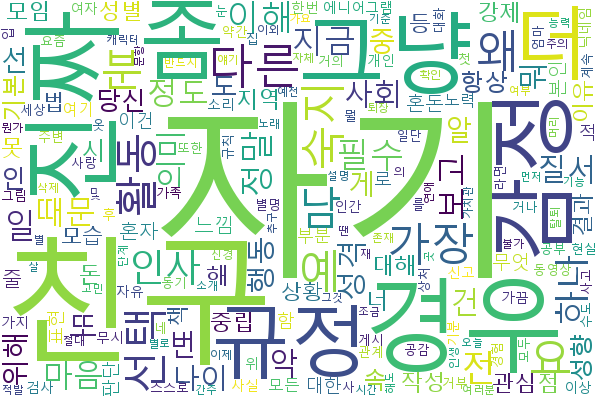

In [198]:
wordcloud.generate_from_frequencies(jcount)
wordcloud.to_image()

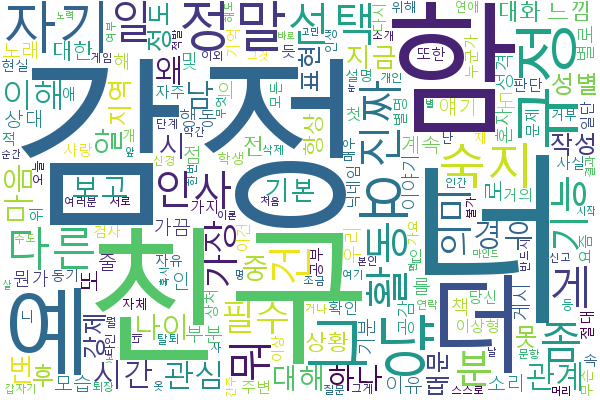

In [199]:
wordcloud.generate_from_frequencies(pcount)
wordcloud.to_image()

# Count vector & Tf-idf vector

In [200]:
from sklearn.feature_extraction.text import CountVectorizer # 빈도 기준
from sklearn.feature_extraction.text import TfidfVectorizer # Tf-idf 기준

In [220]:
count_vect = CountVectorizer()
# min_df = 최소 3번 이상 출현
# max_df = 최대 전체 단어의 5%를 넘지 않도록 (불용어 제거)
# ngram = 2에서 3개까지의 단어 조합을 고려함
cvecte = count_vect.fit_transform(texte) # 희소행렬
cvecti = count_vect.fit_transform(texti) # 희소행렬

In [270]:
print(count_vect.vocabulary_)

{'오픈': 2719, '톡방': 4003, '주제': 3539, '관련': 352, '모임': 1294, '차연': 3704, '카페': 3887, '오프라인': 2718, '개설': 123, '이유': 3004, '진행': 3669, '일정': 3110, '알림': 2426, '대화': 855, '진행자': 3670, '정예': 3401, '스텝': 2174, '명예': 1265, '참석': 3717, '가능': 8, '사람': 1809, '마인드': 1145, '해당': 4304, '관심': 358, '참여': 3719, '신청': 2263, '방법': 1506, '덧글': 876, '입력': 3131, '네이버': 671, '쪽지': 3693, '아래': 2343, '정보': 3387, '전달': 3312, '요청': 2785, '닉네임': 727, '나이': 611, '성별': 1999, '카카오': 3885, '아이디': 2363, '확인': 4430, '방문': 1503, '링크': 1114, '입장': 3137, '코드': 3919, '안내': 2398, '외부': 2765, '절대': 3346, '해제': 4314, '반드시': 1463, '정식': 3396, '바람': 1436, '규칙': 458, '적용': 3301, '변경': 1583, '수정': 2117, '필수': 4205, '참고': 3716, '사항': 1853, '자주': 3193, '이점': 3009, '기본': 531, '중심': 3568, '시간': 2202, '다른': 734, '찻집': 3721, '경우': 215, '불규칙': 1715, '예정': 2684, '자기': 3151, '사진': 1848, '자랑': 3160, '달동': 779, '안이': 2411, '당부': 795, '말씀': 1196, '회원': 4454, '부제': 1680, '유형': 2899, '종종': 3500, '특정': 4051, '게시': 179, '댓글': 858, '머리': 1225, 

In [219]:
dtme = pd.DataFrame(cvecte.todense(), columns=count_vect.get_feature_names())
dtme.head()

,가감,가게,가격,가구,가기,가까이,가끔,가나,가능,가능성,...,흥미,흥분,희귀,희망,희망이,희생,흰색,히로,히트,힐링
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
print("DTM Shape (E): {}".format(dtme.shape)) # (Num_Document, Num_Term)
sparse_entries = (dtme.values==0).sum()
print("Non-/sparse entries: %d / %d" %(dtme.size - sparse_entries, sparse_entries))
print("Sparsity: %.2f%%" %(sparse_entries / dtme.size * 100)) # Sparsity

DTM Shape (E): (23479, 3682)
Non-/sparse entries: 16217 / 86433461
Sparsity: 99.98%


In [224]:
# 행은 Term, 열은 Document인 Term-Document Matrix
tdme = dtme.T
tdme.head()

,0,1,2,3,4,5,6,7,8,9,...,23469,23470,23471,23472,23473,23474,23475,23476,23477,23478
가감,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가게,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가격,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가구,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가기,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
tfidf_vect = TfidfVectorizer()
tvecte = tfidf_vect.fit_transform(texte) 

# LDA

In [235]:
from sklearn.decomposition import LatentDirichletAllocation
NUM_TOPICS = 10 # 잠재토픽의 수를 직접 지정

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS)

# # count vector 사용
# start_time = time.time()
# lda = lda_model.fit_transform(cvecte)
# print('Time Spent on cvect: %.3f secs' %(time.time() - start_time))

# tf-idf 사용
start_time = time.time()
lda = lda_model.fit_transform(tvecte)
print('Time Spent on tvect: %.3f secs' %(time.time() - start_time))

Time Spent on tvect: 15.317 secs


In [236]:
print('lda: {}'.format(lda_c.shape)) # 문서 X 토픽
print('lda components: {}'.format(lda_model.components_.shape)) # 토픽 X 단어

lda: (23479, 10)
lda components: (10, 3682)


In [238]:
def print_topics(model, vectorizer, top_n=10):
    for i, topic in enumerate(model.components_):
        print("Topic %d:" %i)
        print([(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n-1:-1]])
print_topics(lda_model, tfidf_vect)

Topic 0:
[('활동', 79.09999998868756), ('다른', 76.09999998868537), ('인사', 75.09999998868456), ('대해', 52.09999998865779), ('강제', 45.09999998864407), ('그림', 30.099999988593275), ('무슨', 29.09999998858798), ('여기', 27.099999988576233), ('자체', 27.09999998857623), ('갑자기', 26.0999999885697)]
Topic 1:
[('유형', 204.09999998782257), ('관심', 63.09999998776975), ('절대', 43.09999998773344), ('별로', 40.09999998772484), ('시간', 39.0999999877217), ('사랑', 34.09999998770306), ('스스로', 28.099999987671836), ('바로', 27.099999987665264), ('자주', 27.099999987665257), ('노력', 24.099999987642224)]
Topic 2:
[('답변', 155.09999998676562), ('감정', 106.09999998675032), ('마음', 74.09999998672848), ('경우', 60.09999998671171), ('표현', 53.09999998669998), ('모습', 53.09999998669998), ('성별', 46.09999998668457), ('지역', 44.099999986679315), ('때문', 43.09999998667653), ('이건', 34.09999998664349)]
Topic 3:
[('친구', 73.09999998759577), ('기본', 48.099999987560246), ('결과', 42.0999999875454), ('누군가', 37.09999998752923), ('요즘', 34.09999998751729), ('검사

# Classification (Random Forest)

In [260]:
joined_text = np.append(texte, texti, axis=0)

tfidf_vect = TfidfVectorizer()
vect_text = tfidf_vect.fit_transform(joined_text)
data_dense = vect_text.todense()

In [261]:
# num of docs X # num of terms
print(data_dense.shape)

(57308, 6101)


In [263]:
from sklearn.model_selection import train_test_split

labels = np.append(np.ones((23479,)), np.zeros((33829,)), axis=0)  # 1 for E, 0 for I
X_train, X_test, y_train, y_test = train_test_split(data_dense, labels, test_size=0.25, shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42981, 6101)
(42981,)
(14327, 6101)
(14327,)


In [267]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy on training set: 0.656
Accuracy on test set: 0.590


In [268]:
rf_out = pd.DataFrame(rf.feature_importances_, columns=['importance'], index=tfidf_vect.get_feature_names())
rf_out.sort_values('importance', ascending=False)

,importance
질서,0.003569
진짜,0.003352
동영상,0.003106
사회,0.002798
기능,0.002403
필자,0.002339
친구,0.002211
혼돈,0.002140
경우,0.002130
중립,0.002098
